# Visualize GO analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
def get_top_GO(fn, label):
    df = pd.read_excel(fn).sort_values('p_uncorrected').head(10)
    df['Log10'] = -np.log10(df['p_fdr_bh'])
    df['Tissue'] = label
    return df

In [3]:
config = {
    'Caudate': 'GO_analysis_mashr_caudate.xlsx',
    'Dentate Gyrus': 'GO_analysis_mashr_dentate_gyrus.xlsx',
    'DLPFC': 'GO_analysis_mashr_dlpfc.xlsx',
    'Hippocampus': 'GO_analysis_mashr_hippocampus.xlsx',
}

df = pd.DataFrame()
for bias in ["Caudate", "Dentate Gyrus", "DLPFC", "Hippocampus"]:
    df = pd.concat([df, get_top_GO(config[bias], bias)], axis=0)

fac = []
for ii in range(df.shape[0]):
    xx, yy = df[['ratio_in_study']].iloc[ii, 0].split('/')
    fac.append((int(xx) / int(yy)) * 2)
    
df['geneRatio'] = fac
print(np.min(fac), np.max(fac))

0.020497803806734993 1.302325581395349


In [11]:
df.to_csv("GO_analysis_top10_mashr.tsv", sep='\t', index=False)

## Plot 

In [4]:
%load_ext rpy2.ipython

In [7]:
%%R -i df
library(ggplot2)
library(tidyverse)

save_plot <- function(p, fn, w, h){
    for(ext in c('.svg', '.png', '.pdf')){
        ggsave(file=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

plot_GO <- function(){
    cbPalette <- ggpubr::get_palette(palette = "npg", 4)
    gg1 = df %>%
        ggplot(aes(x=Log10, y=name, color=Tissue, size=geneRatio)) + 
        geom_point(shape=18, alpha=0.8) + labs(y='', x='-Log10 (FDR)') + 
        theme_bw(base_size=15) + 
        scale_colour_manual(name="Ancestry", values=cbPalette, 
                            labels=c("Caudate", "Dentate Gyrus", 
                                     "DLPFC", "Hippocampus")) +
        geom_vline(xintercept = -log10(0.05), linetype = "dotted") +
        theme(axis.title=element_text(face='bold'),
              strip.text=element_text(face='bold'))
    return(gg1)
}

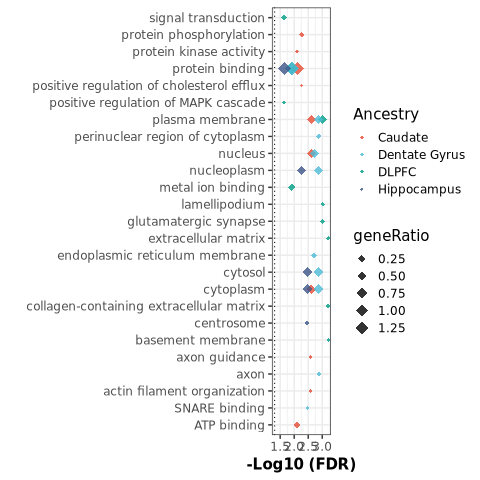

In [10]:
%%R
gg1 = plot_GO()
print(gg1)
save_plot(gg1, "ancestry_mashr_GO_top10_stacked", 8, 6)